In any large, dynamically developing city, the problem of organizing a public transport system is acute. One of the most successful solutions, especially for large cities with a high density of ground transportation, is the subway. At the same time, the success of the built metro system can be measured by the flow of passengers. Therefore, try to identify factors that could explain the differences in metro passenger flows in different cities around the world, and provide one (or more) visuals to describe this phenomenon (using Plotly charts). It is suggested to use the World Metro Database (https://www.kaggle.com/datasets/timmofeyy/-world-metro) data table (attached) as a basis for working on this problem. In this table, passenger flows and fares per metro trip in different cities are available, as well as some other characteristics of the metro itself (number of stations, voltage and type of power supply, etc.). However, this table does not contain all the characteristics that could explain the generation of passenger flow values. Therefore, you will need to justify how these and additional factors could affect the variable you are studying, and you may need to find data sources on the Internet from which to obtain the necessary information (for example, you may need to research fares). 

In [73]:
import pandas as pd 
Metro_cities = pd.read_csv('metro_countries_cities.csv') 
#Metro_progress = pd.read_csv('metro_countries_in_progress.csv')
#Metro_total = pd.read_csv('metro_countries_total.csv')

Metro_cities
#Metro_progress
#Metro_total

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe
...,...,...,...,...,...,...,...,...,...
193,San Juan,United States,Tren Urbano,2004,2005,16,172,1.10,north_america
194,"Washington, D.C.",United States,Washington Metro,1976,2014,91,188,68.10,north_america
195,Tashkent,Uzbekistan,Tashkent Metro,1977,2020,39,571,38.80,asia
196,Caracas,Venezuela,Caracas Metro,1983,2015,52,672,358.00,latin_america


# Key Factors Affecting Passenger Flow #
#### 1. Annual Ridership (millions): 

This is the primary dependent variable we are studying. It represents the total number of passengers using the metro system in a year, which is crucial for assessing the success and efficiency of public transport in a city
#### 2. - Number of Station :
The number of stations in a metro system can significantly influence ridership. More stations typically mean greater accessibility for passengers, encouraging higher usage. This variable allows us to analyze whether larger networks correlate with increased passenger flows.
#### 3. Year of Inauguration (System Age): 
The age of the metro system can impact its ridership patterns. Older systems may have established ridership trends and may have undergone expansions or improvements over time, which could enhance their attractiveness to users.
#### 4. System Length (Km):
The total length of the metro system can also affect ridership. A longer system may connect more areas of a city, facilitating travel across greater distances and potentially increasing annual ridership.
#### 5. Region: 
The geographical region where a city is located can play a significant role in passenger flows due to varying urbanization levels, population densities, cultural attitudes toward public transport, and economic conditions.cg)o usage.


# 1. Metro System Size vs. Annual Ridership #

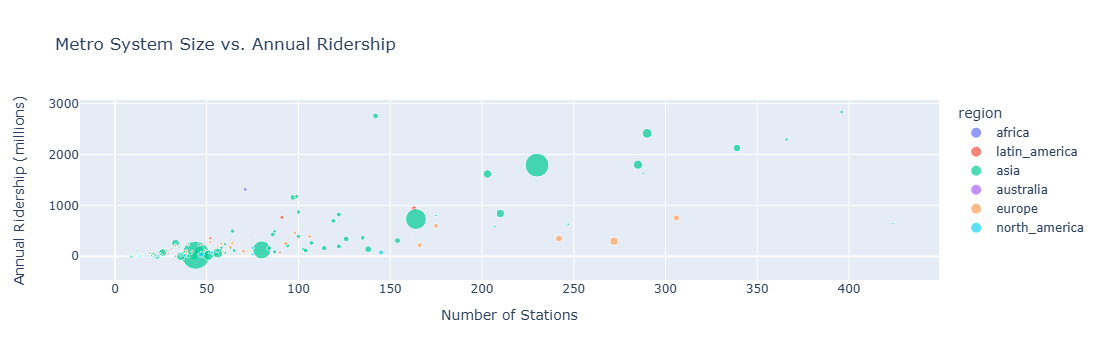

In [71]:
import plotly.express as px

fig = px.scatter(Metro_cities, x='stations', y='annual_ridership_mill',
                 hover_name='city', color='region', size='length_km',
                 labels={'stations': 'Number of Stations',
                         'annual_ridership_mill': 'Annual Ridership (millions)',
                         'length_km': 'System Length (km)'},
                 title='Metro System Size vs. Annual Ridership')
fig.show()

This plot shows a positive correlation between the number of stations and annual ridership. We can observe that cities with more extensive metro systems (more stations and longer networks) tend to have higher ridership

# 2. Metro System Age vs. Annual Ridership #

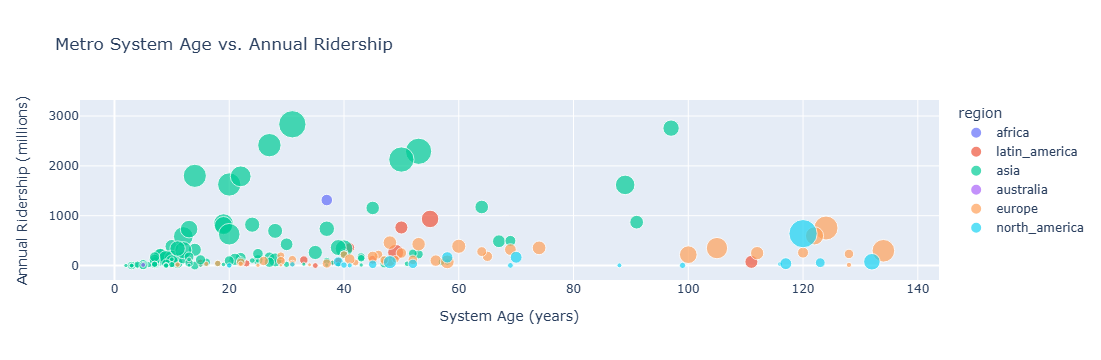

In [54]:
import datetime

current_year = datetime.datetime.now().year

Metro_cities['system_age'] = current_year - Metro_cities['year']

fig = px.scatter(Metro_cities, x='system_age', y='annual_ridership_mill',
                 hover_name='city', color='region', size='stations',
                 labels={'system_age': 'System Age (years)',
                         'annual_ridership_mill': 'Annual Ridership (millions)',
                         'stations': 'Number of Stations'},
                 title='Metro System Age vs. Annual Ridership')
fig.show()

This visualization demonstrates that older systems generally have higher ridership, possibly due to greater familiarity among users, leading to sustained or increased ridership over time.

# 3. Annual Metro Ridership by Region #

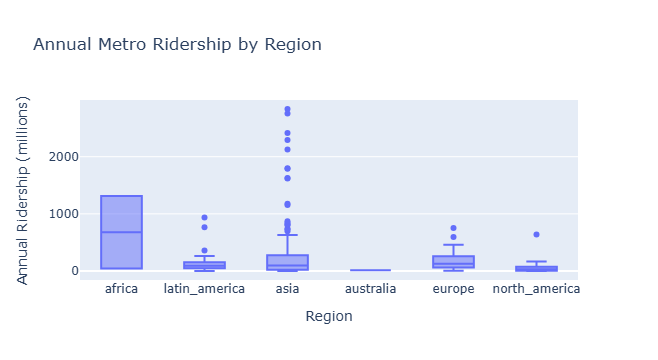

In [88]:
regional_avg = Metro_cities.groupby('region')['annual_ridership_mill'].mean().reset_index()

fig = px.box(Metro_cities, x='region', y='annual_ridership_mill', 
              labels={'region': 'Region',
                      'annual_ridership_mill': 'Annual Ridership (millions)'},
              title='Annual Metro Ridership by Region')
fig.show()

The box plot shows significant variations in ridership across regions. Asian cities tend to have higher ridership compared to other regions, which could be due to dense populations and well-developed metro systems. 

# 4. System Length vs Annual Ridership #

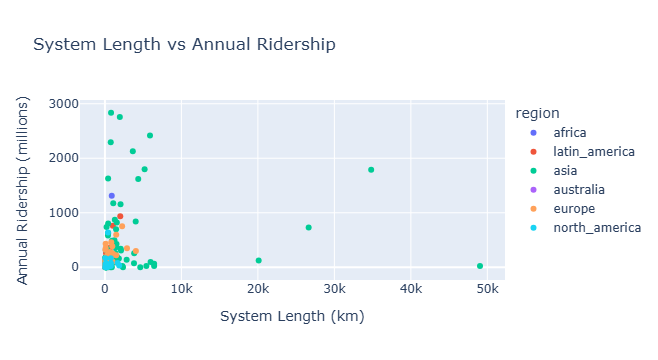

In [90]:
fig = px.scatter(Metro_cities, x='length_km', y='annual_ridership_mill', 
                 hover_data=['city', 'country'], color='region',
                 labels={'length_km': 'System Length (km)', 
                         'annual_ridership_mill': 'Annual Ridership (millions)'},
                 title='System Length vs Annual Ridership')
fig.show()

This plot would show that longer metro systems has a significant correlation  with higher ridership, which means a longer system may connect more areas of a city, facilitating travel across greater distances and potentially increasing annual ridership.

# Additional Factors Influencing Metro Passenger Flows #
### 1. Country Population
### 2. Average Metro Fare
.


In [137]:
import pandas as pd 
Metro_total = pd.read_csv('metro_countries_total.csv')

Metro_total

,country,systems,length,lines,stations,annual_ridership_mill,inauguration,region
0,China,43,8549.62,249,5375,2.10,1969,asia
1,United States,15,1344.70,86,1228,0.75,1892,north_america
2,South Korea,8,871.20,34,728,3.87,1974,asia
3,Japan,13,791.20,45,747,8.19,1927,asia
4,India,15,731.75,31,585,3.70,1984,asia
5,Russia,7,639.10,29,380,3.51,1935,asia
6,Spain,3,458.30,28,539,1.43,1919,europe
7,United Kingdom,3,449.60,19,332,0.77,1863,europe
8,Germany,4,386.80,24,413,3.59,1902,europe
9,France,6,362.00,27,488,3.70,1900,europe


# 5. Average Fare vs Annual Ridership #

                           Fare  annual_ridership_mill
Fare                   1.000000               0.033368
annual_ridership_mill  0.033368               1.000000


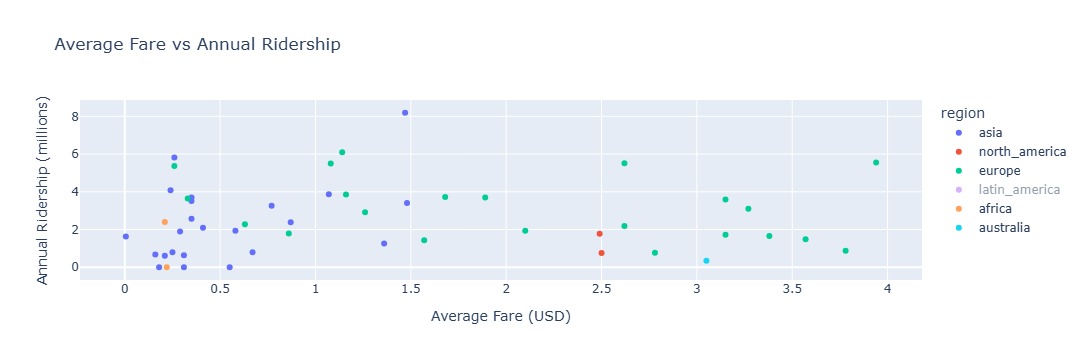

In [139]:
import pandas as pd
import plotly.express as px

# Load datasets
Fare_price = pd.read_csv('Combined_Countries.csv')

# Merge datasets on country name (assuming country names match in both datasets)
merged_data = pd.merge(Metro_total, Fare_price[['Country', 'One-way Ticket']], 
                        left_on='country', right_on='Country', how='left')

# Rename columns for clarity
merged_data.rename(columns={'One-way Ticket': 'Fare'}, inplace=True)

#Calculate correlation between Fare and Annual Ridership
correlation = merged_data[['Fare', 'annual_ridership_mill']].corr()
print(correlation)

# Create a scatter plot to visualize the relationship between Fare and Annual Ridership
fig = px.scatter(merged_data, x='Fare', y='annual_ridership_mill',
                 hover_name='country', color='region',
                 labels={'Fare': 'Average Fare (USD)', 
                         'annual_ridership_mill': 'Annual Ridership (millions)'},
                 title='Average Fare vs Annual Ridership')
fig.show()

Minimal(Weak) correlation between fare and ridership Which can suggests that changes in fare prices do not significantly impact ridership levels across different metro systems. Other factors may play a more critical role in determining passenger flows.

# 6. Population vs Annual Ridership #

In [143]:
import pandas as pd 
Population = pd.read_excel('population of country.xlsx')

Population

,Country,Population 2021
0,United Arab Emirates,9991083
1,Argentina,45808747
2,Armenia,2968128
3,Australia,25739256
4,Austria,8956279
5,Azerbaijan,10145212
6,Belgium,11587882
7,Bulgaria,6899125
8,Belarus,9340314
9,Brazil,213993441


In [167]:
# Rename columns for consistency if necessary
Population.rename(columns={'Country': 'country'}, inplace=True)

# Merge datasets on country name
merged_data = pd.merge(Metro_total[['country', 'annual_ridership_mill', 'region']], 
                        Population[['country', 'Population 2021']],
                        on='country', how='left')

# Check merged data
print(merged_data.head())


         country  annual_ridership_mill         region  Population 2021
0          China                   2.10           asia     1.412360e+09
1  United States                   0.75  north_america     3.318937e+08
2    South Korea                   3.87           asia     5.171759e+07
3          Japan                   8.19           asia     1.256816e+08
4          India                   3.70           asia     1.393409e+09


In [153]:
# Calculate correlation between Population and Annual Ridership
correlation = merged_data[['Population 2021', 'annual_ridership_mill']].corr()
print("Correlation between Population and Annual Ridership:")
print(correlation)

Correlation between Population and Annual Ridership:
                       Population 2021  annual_ridership_mill
Population 2021               1.000000              -0.001253
annual_ridership_mill        -0.001253               1.000000


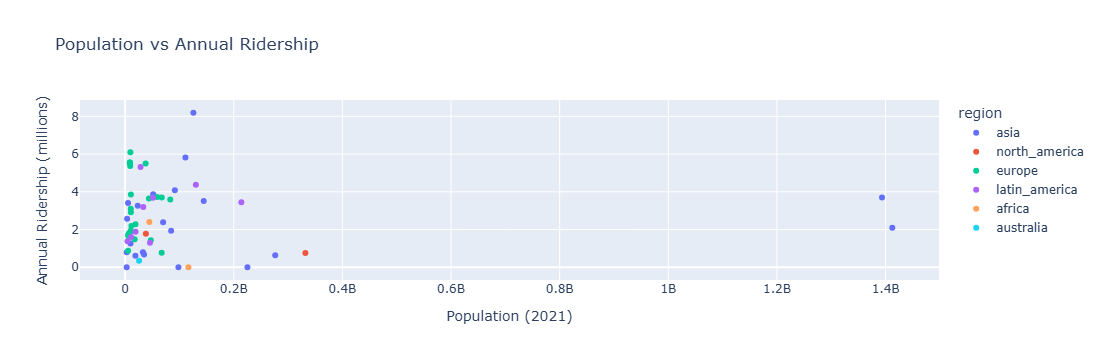

In [169]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(merged_data.dropna(), x='Population 2021', y='annual_ridership_mill',
                 hover_name='country', color='region',
                 labels={'Population 2021': 'Population (2021)', 
                         'annual_ridership_mill': 'Annual Ridership (millions)'},
                 title='Population vs Annual Ridership')
fig.show()

This suggests that larger populations do not automatically translate into higher metro usage, similar to fare prices, this suggests that a larger population does not necessarily lead to higher ridership in metro systems. Factors such as urban density and public transport policies may be more influential.